# Phase 1: Data Collection


In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time

In [3]:
#) Index getting into Data Frame
df_us=pd.read_csv("US Project")
df_us

,DATE,CSUSHPISA
0,1987-01-01,63.965
1,1987-02-01,64.424
2,1987-03-01,64.736
3,1987-04-01,65.132
4,1987-05-01,65.563
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [4]:
#) According to Project i took Date from 2003-11-30 to present,so i have to change date.

df_us["DATE"] = pd.to_datetime(df_us["DATE"])


pavan= df_us["DATE"] >= "2003-11-30"
df_us = df_us[pavan]

df_us


,DATE,CSUSHPISA
203,2003-12-01,140.179
204,2004-01-01,141.646
205,2004-02-01,143.192
206,2004-03-01,145.059
207,2004-04-01,146.593
...,...,...
436,2023-05-01,302.566
437,2023-06-01,304.593
438,2023-07-01,306.767
439,2023-08-01,309.155


In [5]:
df_us.reset_index(inplace = True)
df_us.drop(columns = ["index"], inplace = True)


df_us["Year"] = pd.DatetimeIndex(df_us["DATE"]).year
df_us["Month"] = pd.DatetimeIndex(df_us["DATE"]).month
print(df_us.shape)
df_us

(238, 4)


,DATE,CSUSHPISA,Year,Month
0,2003-12-01,140.179,2003,12
1,2004-01-01,141.646,2004,1
2,2004-02-01,143.192,2004,2
3,2004-03-01,145.059,2004,3
4,2004-04-01,146.593,2004,4
...,...,...,...,...
233,2023-05-01,302.566,2023,5
234,2023-06-01,304.593,2023,6
235,2023-07-01,306.767,2023,7
236,2023-08-01,309.155,2023,8


In [6]:
df_gdp = pd.read_csv("GDP", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_gdp.shape)
df_gdp.tail()

(87, 2)


,DATE,Per_Capita_GDP
82,2022-07-01,77875.0
83,2022-10-01,79000.0
84,2023-01-01,80126.0
85,2023-04-01,80781.0
86,2023-07-01,82397.0


In [7]:
df_un = pd.read_csv("un employment rate", names = ["DATE","un_employment_rate"], skiprows = 1)
print(df_un.shape)
df_un.tail()

(1130, 2)


,DATE,un_employment_rate
1125,2023-10-28,1.2
1126,2023-11-04,1.2
1127,2023-11-11,1.2
1128,2023-11-18,1.3
1129,2023-11-25,1.2


In [8]:
df_med = pd.read_csv("Median house income", names = ["DATE","Median_house_income"], skiprows = 1)
print(df_med.shape)
df_med.tail()

(21, 2)


,DATE,Median_house_income
16,2018-01-01,73030
17,2019-01-01,78250
18,2020-01-01,76660
19,2021-01-01,76330
20,2022-01-01,74580


In [9]:
df_int = pd.read_csv("Interest rate", names = ["DATE","Interest_rate"], skiprows = 1)
print(df_int.shape)
df_int.tail()

(248, 2)


,DATE,Interest_rate
243,2021-04-01,0.25
244,2021-05-01,0.25
245,2021-06-01,0.25
246,2021-07-01,0.25
247,2021-08-01,0.25


In [10]:
df_cpi = pd.read_csv("CPI", names = ["DATE","consumer_price_index"], skiprows = 1)
print(df_cpi.shape)
df_cpi.tail()

(250, 2)


,DATE,consumer_price_index
245,2023-06-01,303.841
246,2023-07-01,304.348
247,2023-08-01,306.269
248,2023-09-01,307.481
249,2023-10-01,307.619


In [11]:
df_gov = pd.read_csv("Government subsidies", names = ["DATE","Government_subsidies"], skiprows = 1)
print(df_gov.shape)
df_gov.tail()

(21, 2)


,DATE,Government_subsidies
16,2018-01-01,38.859
17,2019-01-01,40.185
18,2020-01-01,44.147
19,2021-01-01,45.299
20,2022-01-01,48.021


In [12]:
df_mon = pd.read_csv("monthly supplies of new houses", names = ["DATE","monthly_supplies_of_newhouses"], skiprows = 1)
print(df_mon.shape)
df_mon.tail()


(250, 2)


,DATE,monthly_supplies_of_newhouses
245,2023-06-01,7.5
246,2023-07-01,7.1
247,2023-08-01,7.8
248,2023-09-01,7.2
249,2023-10-01,7.8


In [13]:
df_mat = pd.read_csv("materials prices", names = ["DATE","materials_prices"], skiprows = 1)
print(df_mat.shape)
df_mat.tail()

(242, 2)


,DATE,materials_prices
237,2023-06-01,337.336
238,2023-07-01,334.576
239,2023-08-01,333.980
240,2023-09-01,332.224
241,2023-10-01,329.690


# Phase 2: Data Preparation

In [15]:
df_gdp["DATE"] = pd.to_datetime(df_gdp["DATE"])
df = pd.merge(df_us,df_gdp, how = "left")
df.head()

,DATE,CSUSHPISA,Year,Month,Per_Capita_GDP
0,2003-12-01,140.179,2003,12,NaN
1,2004-01-01,141.646,2004,1,40801.0
2,2004-02-01,143.192,2004,2,NaN
3,2004-03-01,145.059,2004,3,NaN
4,2004-04-01,146.593,2004,4,41358.0


In [16]:
df = pd.DataFrame()
df_mon = [df_us, df_med, df_un, df_cpi,df_gdp,df_gov,df_mat,df_int]
for df1 in df_mon:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.head()

(1367, 10)


,CSUSHPISA,Year,Month,Median_house_income,un_employment_rate,consumer_price_index,Per_Capita_GDP,Government_subsidies,materials_prices,Interest_rate
DATE,,,,,,,,,,
2001-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.52
2001-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.00
2001-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.81
2001-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.28
2001-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.73


In [17]:
df.isnull().sum()

CSUSHPISA               1129
Year                    1129
Month                   1129
Median_house_income     1346
un_employment_rate       237
consumer_price_index    1117
Per_Capita_GDP          1280
Government_subsidies    1346
materials_prices        1125
Interest_rate           1119
dtype: int64

In [18]:
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()
df["CSUSHPISA"] = df["CSUSHPISA"].interpolate()
df["Year"] = df["Year"].interpolate()
df["Month"] = df["Month"].interpolate()
df["Median_house_income"] = df["Median_house_income"].interpolate()
df["un_employment_rate"] = df["un_employment_rate"].interpolate()
df["consumer_price_index"] = df["consumer_price_index"].interpolate()
df["Government_subsidies"] = df["Government_subsidies"].interpolate()
df["materials_prices"] = df["materials_prices"].interpolate()
df["Interest_rate"] = df["Interest_rate"].interpolate()


In [19]:

df.dropna(inplace = True)
df.isnull().sum()

CSUSHPISA               0
Year                    0
Month                   0
Median_house_income     0
un_employment_rate      0
consumer_price_index    0
Per_Capita_GDP          0
Government_subsidies    0
materials_prices        0
Interest_rate           0
dtype: int64

In [20]:
df

,CSUSHPISA,Year,Month,Median_house_income,un_employment_rate,consumer_price_index,Per_Capita_GDP,Government_subsidies,materials_prices,Interest_rate
DATE,,,,,,,,,,
2003-12-01,140.1790,2003.0,12.0,65768.196721,2.6,185.500,40654.666667,27.096820,149.70,2.00
2003-12-06,140.4724,2003.2,9.8,65766.557377,2.6,185.660,40683.933333,27.117656,149.76,2.00
2003-12-13,140.7658,2003.4,7.6,65764.918033,2.6,185.820,40713.200000,27.138492,149.82,2.00
2003-12-20,141.0592,2003.6,5.4,65763.278689,2.6,185.980,40742.466667,27.159328,149.88,2.00
2003-12-27,141.3526,2003.8,3.2,65761.639344,2.6,186.140,40771.733333,27.180164,149.94,2.00
...,...,...,...,...,...,...,...,...,...,...
2023-10-28,311.1750,2023.0,9.0,74580.000000,1.2,307.619,82397.000000,48.021000,329.69,0.25
2023-11-04,311.1750,2023.0,9.0,74580.000000,1.2,307.619,82397.000000,48.021000,329.69,0.25
2023-11-11,311.1750,2023.0,9.0,74580.000000,1.2,307.619,82397.000000,48.021000,329.69,0.25


In [21]:
df.to_csv("prepared_dataset.csv")

In [22]:
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Median_house_income,un_employment_rate,consumer_price_index,Per_Capita_GDP,Government_subsidies,materials_prices,Interest_rate
DATE,,,,,,,,,,
2003-12-01,140.1790,2003.0,12.0,65768.196721,2.6,185.50,40654.666667,27.096820,149.70,2.0
2003-12-06,140.4724,2003.2,9.8,65766.557377,2.6,185.66,40683.933333,27.117656,149.76,2.0
2003-12-13,140.7658,2003.4,7.6,65764.918033,2.6,185.82,40713.200000,27.138492,149.82,2.0
2003-12-20,141.0592,2003.6,5.4,65763.278689,2.6,185.98,40742.466667,27.159328,149.88,2.0
2003-12-27,141.3526,2003.8,3.2,65761.639344,2.6,186.14,40771.733333,27.180164,149.94,2.0


# Phase 3 : Exploratory Data Analysis (EDA)

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Median_house_income,un_employment_rate,consumer_price_index,Per_Capita_GDP,Government_subsidies,materials_prices,Interest_rate
DATE,,,,,,,,,,
2003-12-01,140.1790,2003.0,12.0,65768.196721,2.6,185.50,40654.666667,27.096820,149.70,2.0
2003-12-06,140.4724,2003.2,9.8,65766.557377,2.6,185.66,40683.933333,27.117656,149.76,2.0
2003-12-13,140.7658,2003.4,7.6,65764.918033,2.6,185.82,40713.200000,27.138492,149.82,2.0
2003-12-20,141.0592,2003.6,5.4,65763.278689,2.6,185.98,40742.466667,27.159328,149.88,2.0
2003-12-27,141.3526,2003.8,3.2,65761.639344,2.6,186.14,40771.733333,27.180164,149.94,2.0


In [25]:
df.drop(columns = ["Year", "Month"], inplace = True)

Using Scatterplot for clear observation

<AxesSubplot:xlabel='Median_house_income', ylabel='CSUSHPISA'>

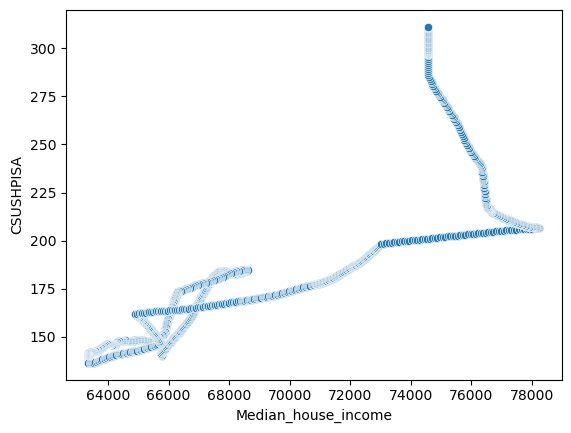

In [27]:
import seaborn as sns
sns.scatterplot(x='Median_house_income',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='un_employment_rate', ylabel='CSUSHPISA'>

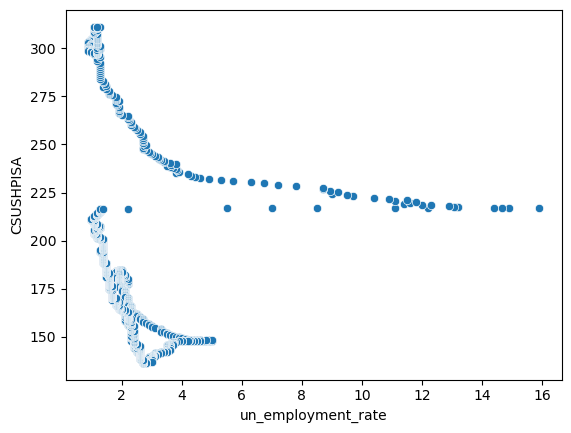

In [28]:
sns.scatterplot(x='un_employment_rate',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='consumer_price_index', ylabel='CSUSHPISA'>

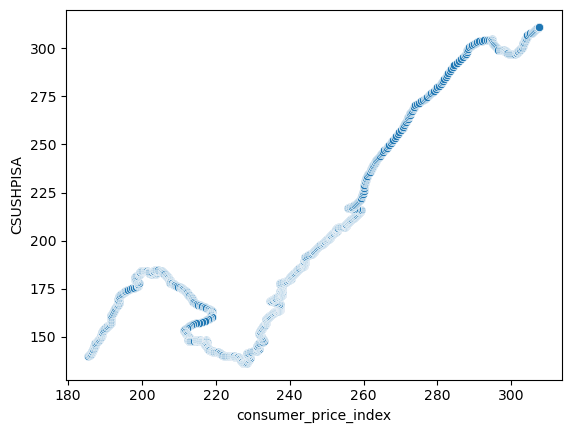

In [29]:
sns.scatterplot(x='consumer_price_index',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='Per_Capita_GDP', ylabel='CSUSHPISA'>

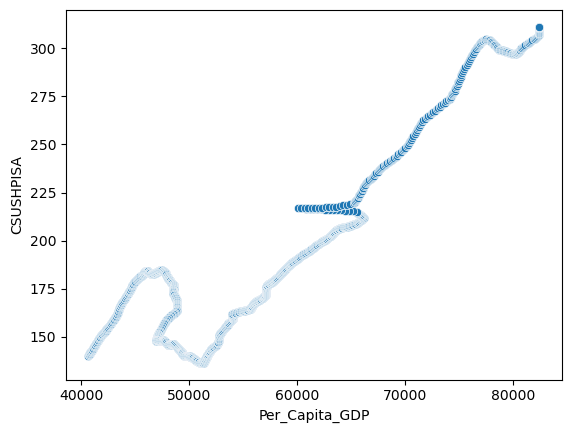

In [30]:
sns.scatterplot(x='Per_Capita_GDP',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='Government_subsidies', ylabel='CSUSHPISA'>

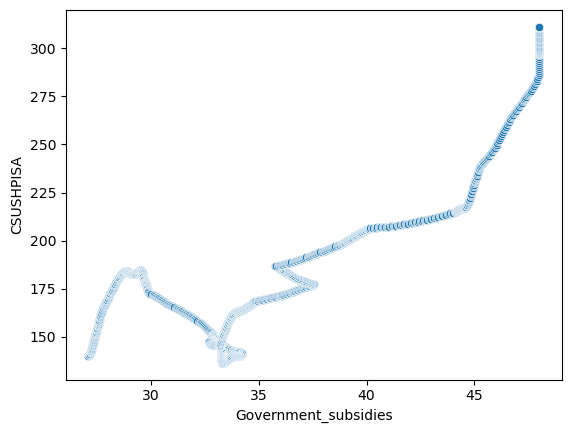

In [31]:
sns.scatterplot(x='Government_subsidies',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='materials_prices', ylabel='CSUSHPISA'>

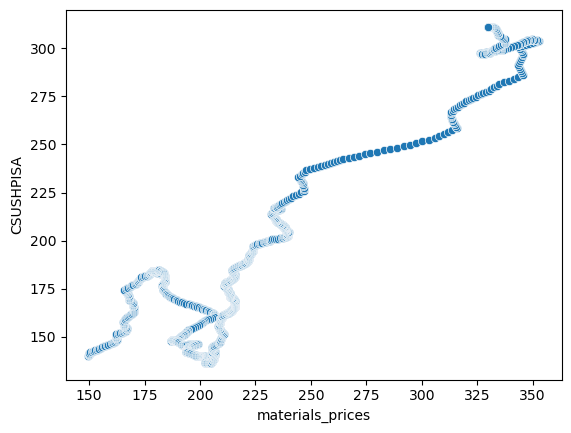

In [32]:
sns.scatterplot(x='materials_prices',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='Interest_rate', ylabel='CSUSHPISA'>

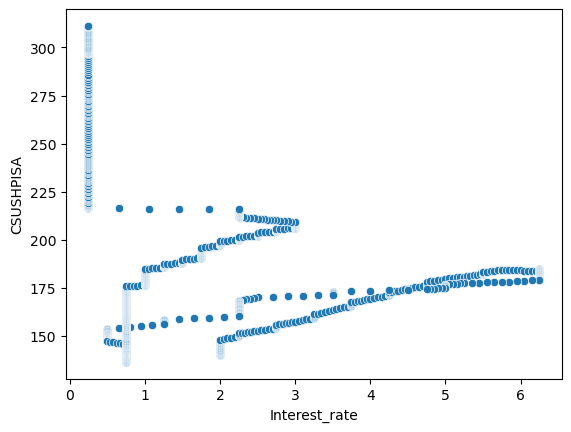

In [33]:
sns.scatterplot(x='Interest_rate',y='CSUSHPISA',data=df)

<AxesSubplot:xlabel='CSUSHPISA', ylabel='CSUSHPISA'>

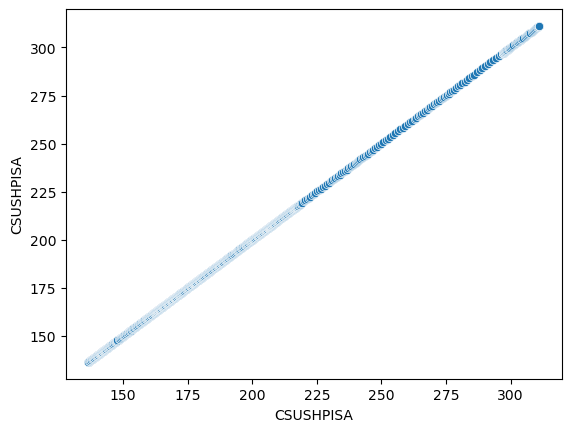

In [34]:
sns.scatterplot(x='CSUSHPISA',y='CSUSHPISA',data=df)

CORRELATION

In [35]:
df.corr()

,CSUSHPISA,Median_house_income,un_employment_rate,consumer_price_index,Per_Capita_GDP,Government_subsidies,materials_prices,Interest_rate
CSUSHPISA,1.000000,0.795634,-0.193178,0.847130,0.906277,0.854635,0.912635,-0.177586
Median_house_income,0.795634,1.000000,-0.111433,0.733038,0.804133,0.806907,0.679783,-0.088210
un_employment_rate,-0.193178,-0.111433,1.000000,-0.136109,-0.178048,-0.018268,-0.178436,-0.225489
consumer_price_index,0.847130,0.733038,-0.136109,1.000000,0.987143,0.966504,0.953499,-0.551558
Per_Capita_GDP,0.906277,0.804133,-0.178048,0.987143,1.000000,0.969424,0.960718,-0.456676
Government_subsidies,0.854635,0.806907,-0.018268,0.966504,0.969424,1.000000,0.932314,-0.540735
materials_prices,0.912635,0.679783,-0.178436,0.953499,0.960718,0.932314,1.000000,-0.486291
Interest_rate,-0.177586,-0.088210,-0.225489,-0.551558,-0.456676,-0.540735,-0.486291,1.000000


<AxesSubplot:>

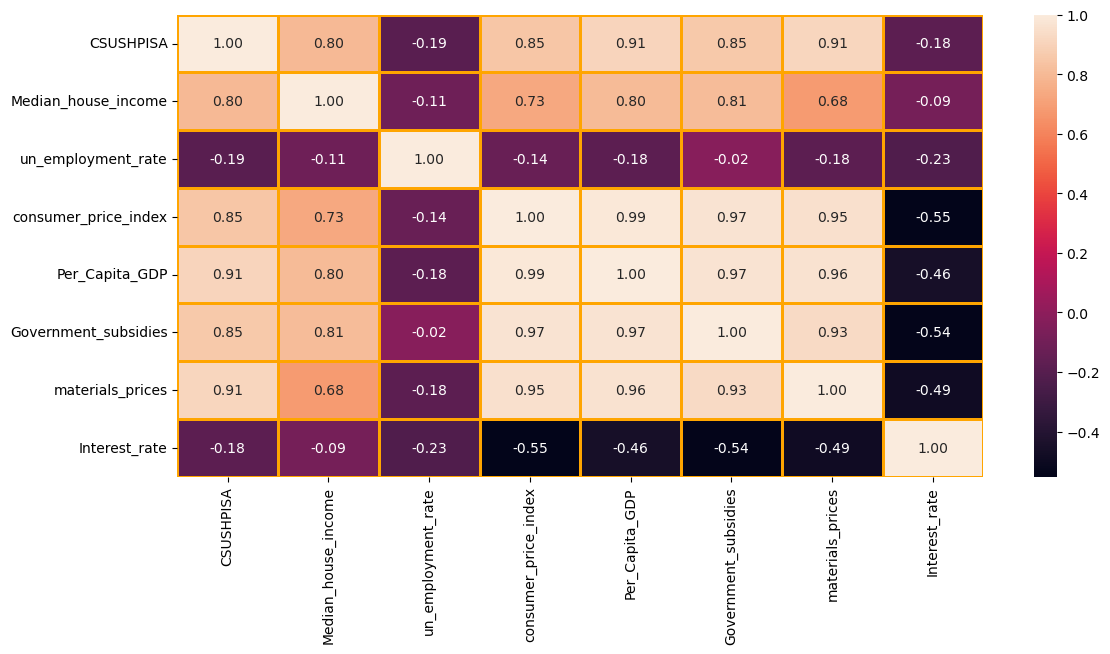

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,6))
sns.heatmap(df.corr(),annot=True, linewidth=0.8, linecolor="orange",fmt='.2f')

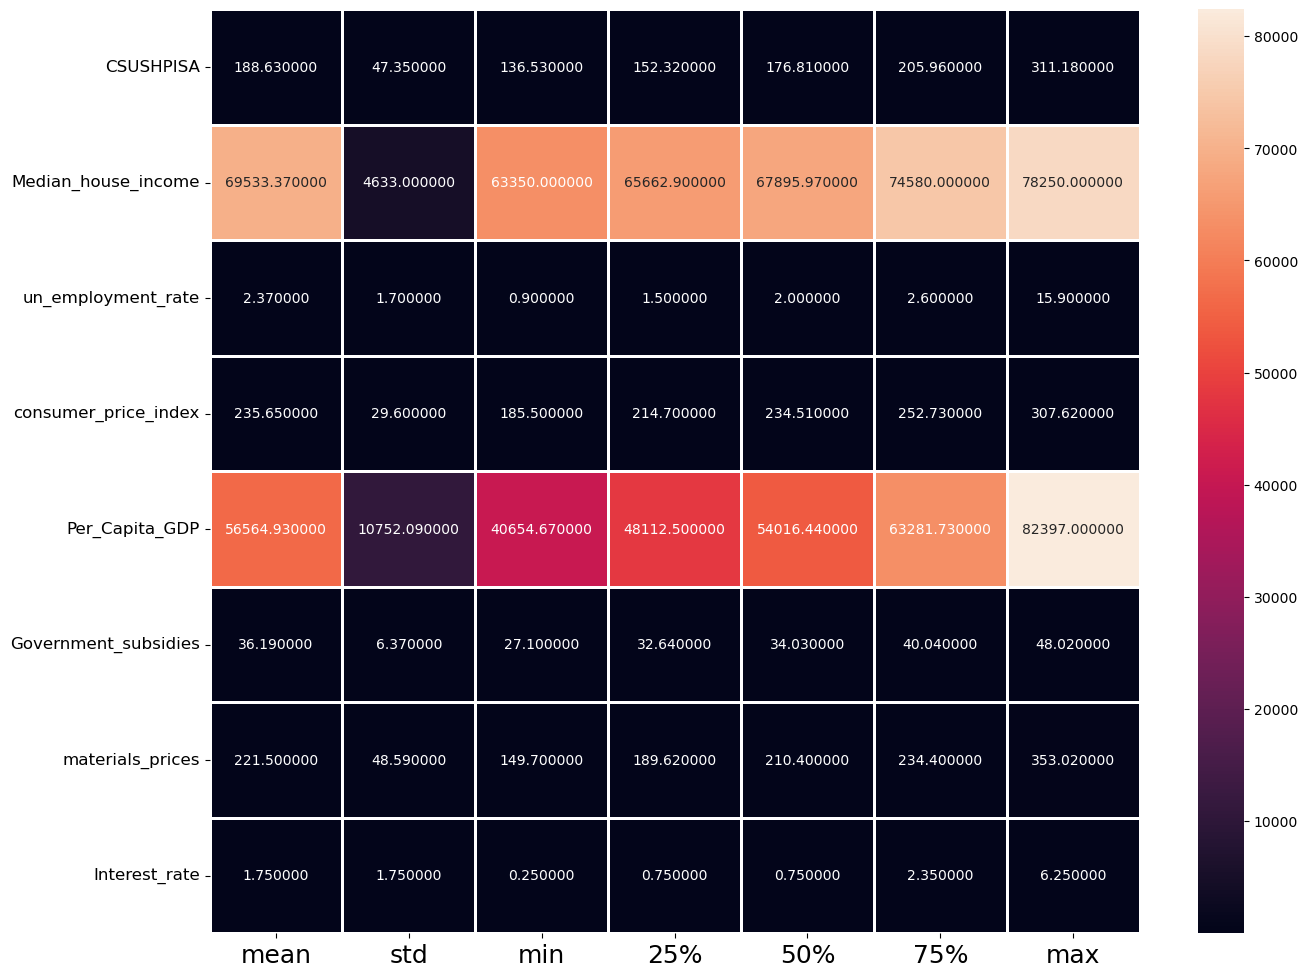

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

Skew and presentaion of Distplot

In [38]:
df.skew()

CSUSHPISA               1.283487
Median_house_income     0.368821
un_employment_rate      4.193954
consumer_price_index    0.578495
Per_Capita_GDP          0.800354
Government_subsidies    0.587763
materials_prices        1.360190
Interest_rate           1.402669
dtype: float64

<AxesSubplot:xlabel='CSUSHPISA', ylabel='Density'>

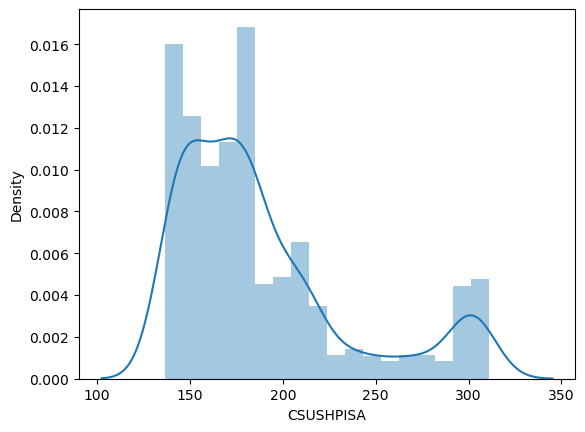

In [39]:
sns.distplot(df["CSUSHPISA"])

<AxesSubplot:xlabel='Median_house_income', ylabel='Density'>

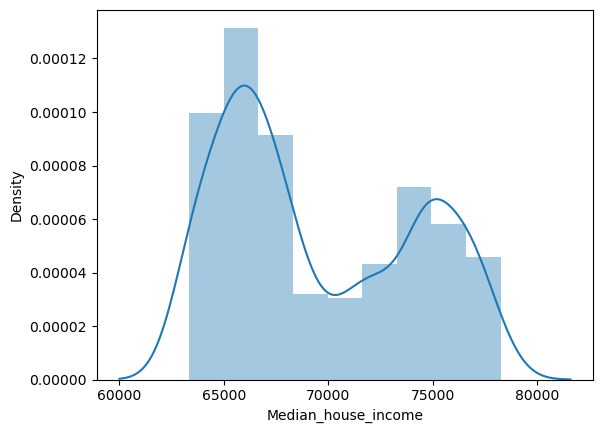

In [40]:
sns.distplot(df["Median_house_income"])

<AxesSubplot:xlabel='un_employment_rate', ylabel='Density'>

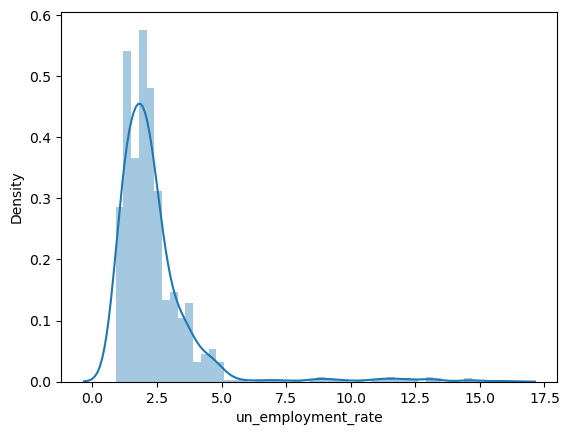

In [41]:
sns.distplot(df["un_employment_rate"])

<AxesSubplot:xlabel='consumer_price_index', ylabel='Density'>

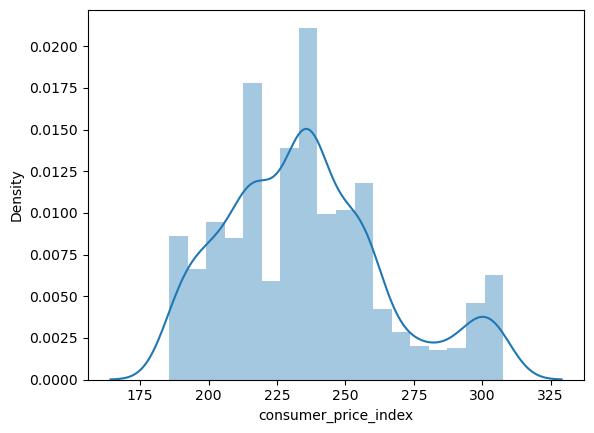

In [42]:
sns.distplot(df["consumer_price_index"])

<AxesSubplot:xlabel='Per_Capita_GDP', ylabel='Density'>

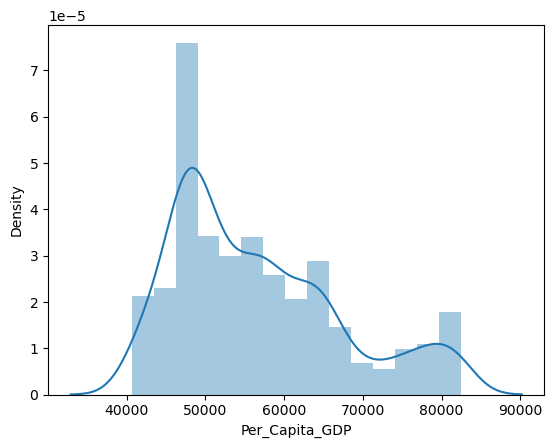

In [43]:
sns.distplot(df["Per_Capita_GDP"])

<AxesSubplot:xlabel='Government_subsidies', ylabel='Density'>

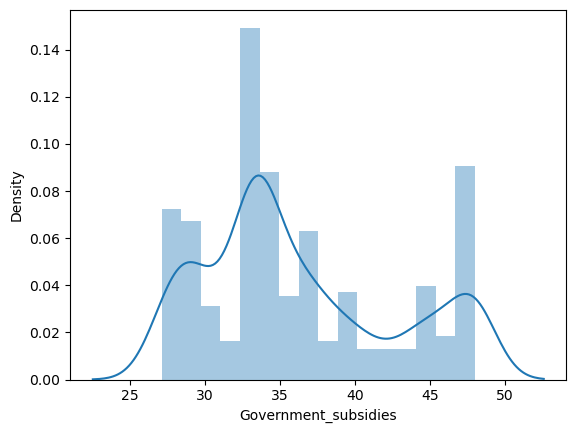

In [44]:
sns.distplot(df["Government_subsidies"])

<AxesSubplot:xlabel='materials_prices', ylabel='Density'>

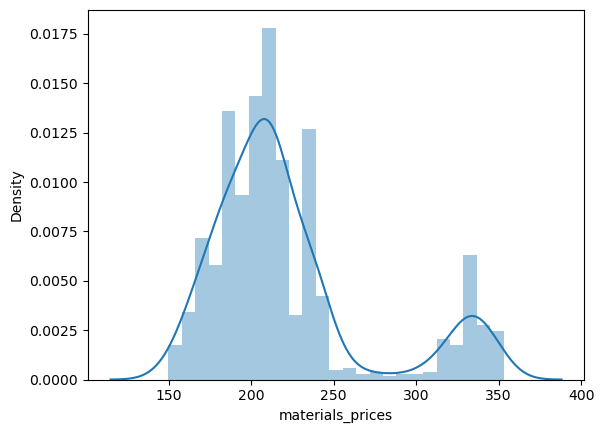

In [45]:
sns.distplot(df["materials_prices"])

<AxesSubplot:xlabel='Interest_rate', ylabel='Density'>

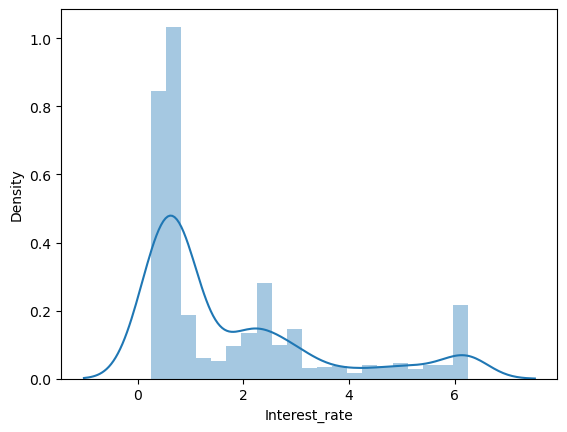

In [46]:
sns.distplot(df["Interest_rate"])

Correlation Matrix Heat Map

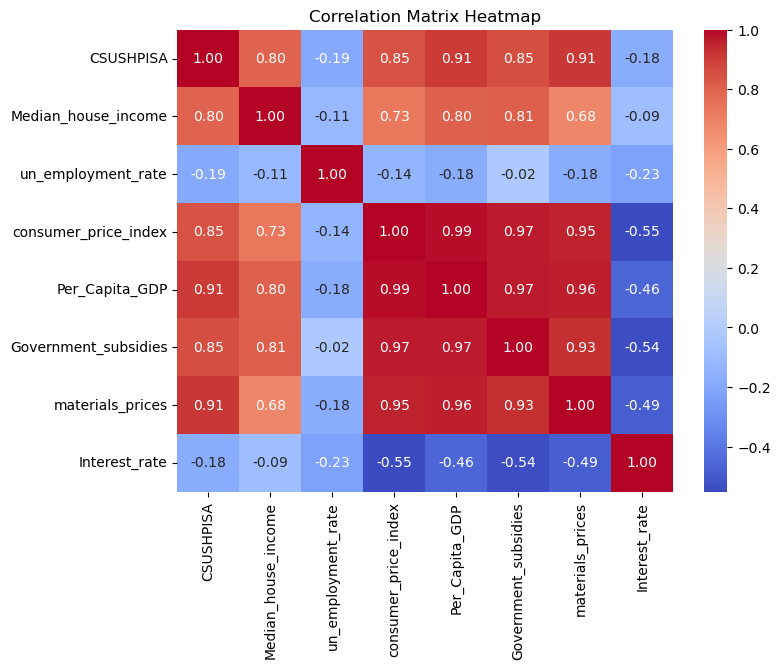

In [47]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [48]:
y = df.pop("CSUSHPISA")
X = df

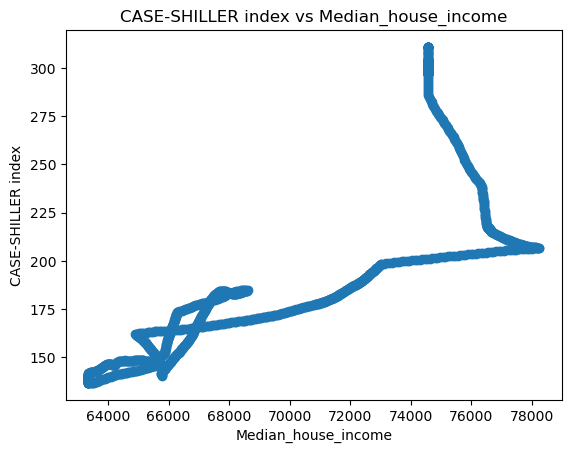

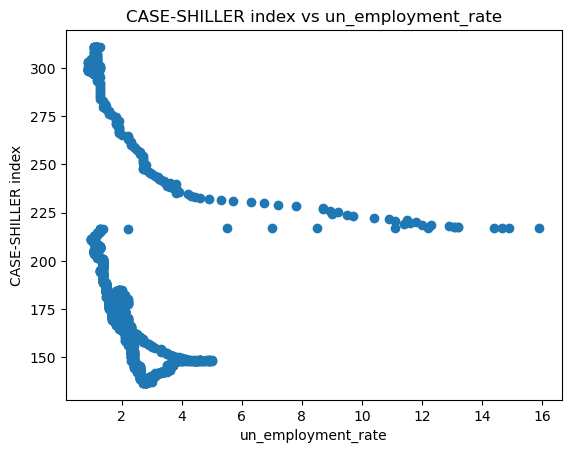

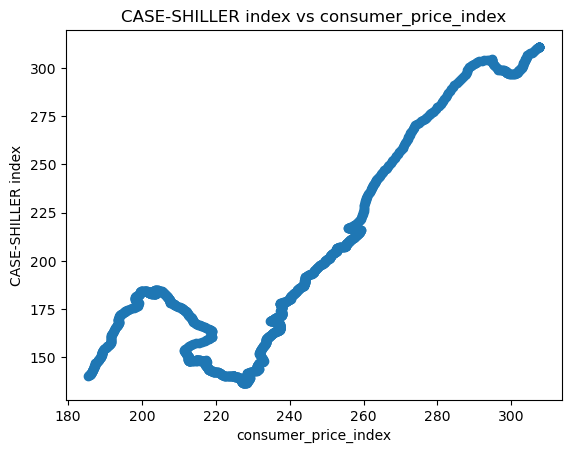

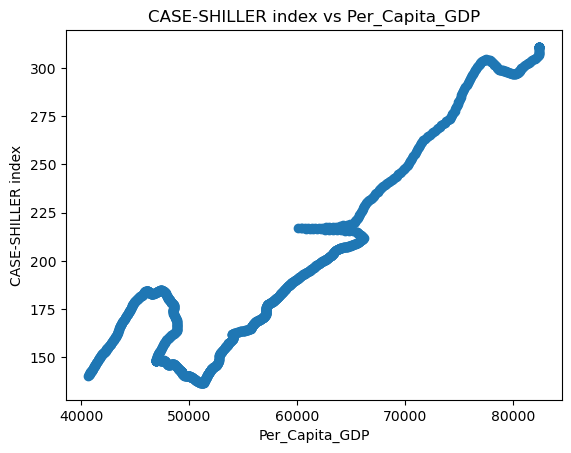

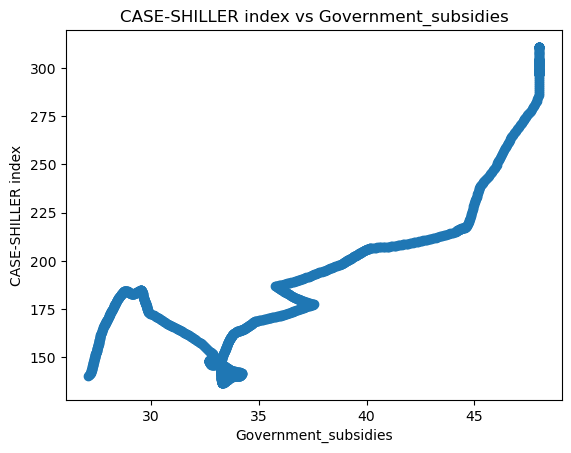

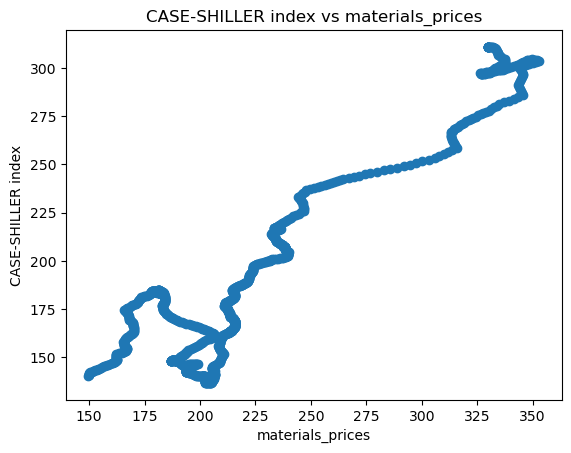

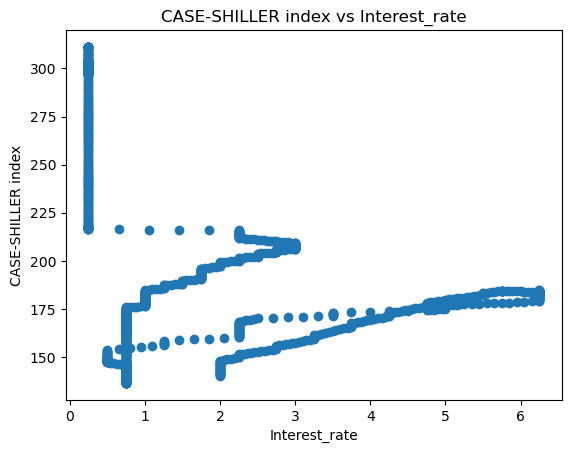

In [49]:
for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

# Phase 4 : Model Buldings

Mean Square Error

Mean Squared Error: 35.57703032818215


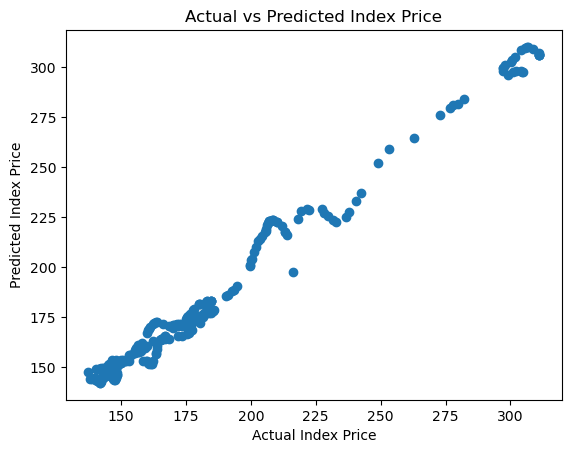

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv("prepared_dataset.csv").set_index("DATE")

X = df.drop(columns=["CSUSHPISA"])
y = df["CSUSHPISA"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price")
plt.title("Actual vs Predicted Index Price")
plt.show()


Made Predction with Linear Regression

Linear Regression Mean Squared Error: 35.57703032818215


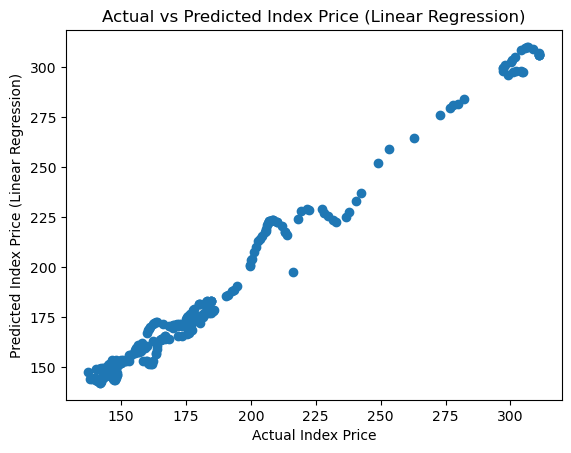

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


linear_pred = linear_model.predict(X_test)


mse_linear = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression Mean Squared Error: {mse_linear}")


plt.scatter(y_test, linear_pred)
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price (Linear Regression)")
plt.title("Actual vs Predicted Index Price (Linear Regression)")
plt.show()


Made Predction with Decision Tree Regression

Decision Tree Mean Squared Error: 0.7419583374533306


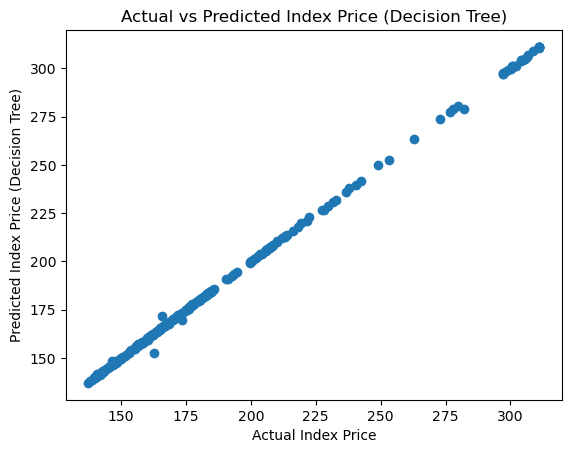

In [52]:
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)


tree_pred = tree_model.predict(X_test)


mse_tree = mean_squared_error(y_test, tree_pred)
print(f"Decision Tree Mean Squared Error: {mse_tree}")


plt.scatter(y_test, tree_pred)
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price (Decision Tree)")
plt.title("Actual vs Predicted Index Price (Decision Tree)")
plt.show()


Made Predction with Random Forest Regression 

Random Forest Mean Squared Error: 0.10291108386236943


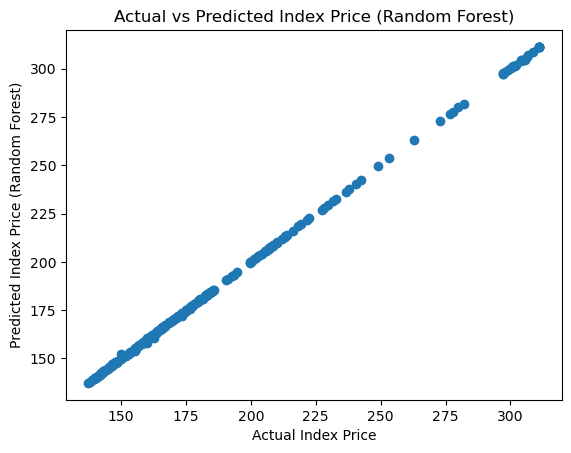

In [53]:
from sklearn.ensemble import RandomForestRegressor



forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)


forest_pred = forest_model.predict(X_test)


mse_forest = mean_squared_error(y_test, forest_pred)
print(f"Random Forest Mean Squared Error: {mse_forest}")


plt.scatter(y_test, forest_pred)
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price (Random Forest)")
plt.title("Actual vs Predicted Index Price (Random Forest)")
plt.show()


Made Predction with Support Vector Regression

SVM Mean Squared Error: 69.58988816357011


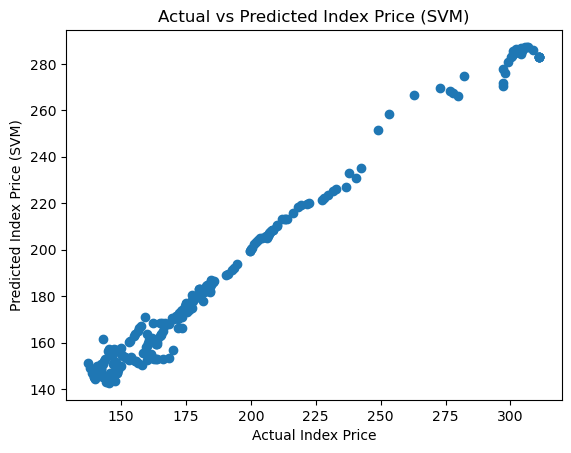

In [54]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVR()
svm_model.fit(X_train_scaled, y_train)


svm_pred = svm_model.predict(X_test_scaled)


mse_svm = mean_squared_error(y_test, svm_pred)
print(f"SVM Mean Squared Error: {mse_svm}")


plt.scatter(y_test, svm_pred)
plt.xlabel("Actual Index Price")
plt.ylabel("Predicted Index Price (SVM)")
plt.title("Actual vs Predicted Index Price (SVM)")
plt.show()


In [55]:
coefs = model.coef_
cols = df.columns
for i in range(len(coefs)):
    print(f"The coefficient for {cols[i]} is {coefs[i]}")

The coefficient for CSUSHPISA is -8.462044908757964
The coefficient for Year is -0.7705892482646706
The coefficient for Month is 0.0031673306478390444
The coefficient for Median_house_income is 2.131177429209215
The coefficient for un_employment_rate is -0.1590033510064262
The coefficient for consumer_price_index is 0.00593292991354843
The coefficient for Per_Capita_GDP is 0.24012740836047244
The coefficient for Government_subsidies is 0.41134781068735843
The coefficient for materials_prices is 1.764387830010595


In [56]:
print("The intercept is: ", model.intercept_)

The intercept is:  16605.232780126054


# MY OPINION

Based on the linear regression model and its coefficients
we can draw several conclusions about the factors that influence US home prices nationally using the provided dataset. 
Here's a summary

# SOME POSITIVE IMPACTS

 PER CAPITA GDP : The coefficient for PerCapita_GDP is approximately 0.24.
                  so i  think increase in per capita GDP positively influences home prices.
                  A wealthier population may have more purchasing power for real estate. 

GOVERNMENT SUBSIDIES : The coefficient for Government subsidies is approximately 0.41.
                        Government interventions or incentives may encourage home buying.                      

MATERIAL PRICESES: The coefficient for materials prices is approximately 1.76.
                   So this implies that an increase in materials prices positively influences home prices.
                   Higher construction costs may contribute to higher home prices.

CONSUMER PRICE INDEX (CPI):The coefficient for consumer price index is approximately 0.0059.
                           So i think thisindicates that an increase in the consumer price index is associated with higher home prices
                           This could be linked to inflation and the rising cost of goods and services

MEDIAN HOUSE INCOME: The coefficient for Median house income is approximately 2.13. This implies that an increase in median household income positively impacts home prices. Higher incomes may lead to increased demand for homes and a willingness to pay higher prices.

# SOME NEGATIVE IMPACTS

UNEMPLOYMENT RATE: The coefficient for un employment rate is approximately -0.16
                   This suggests that higher unemployment rates have a negative impact on home prices
                   Economic uncertainty and unemployment can lead to reduced demand for housing

YEARS :  The coefficient for the Year feature is approximately -0.77
         So i think this suggests that, on average, there is a negative impact on home prices over the years. This could be due to various economic factors or market trends affecting the housing market negatively

# CONCLUSION

In conclusion, several economic and demographic factors play a role in influencing US home prices. Factors such as income, GDP, government subsidies, and materials prices tend to have a positive impact, while factors like increasing unemployment rates and the passage of time (Year) may have a negative influence. It's important to consider these factors collectively to understand the complex dynamics of the real estate market.

THANK YOU 

With the help of this  Project, i got ability to work with data and improved my Analyical skills.
once again thanks for your valuable time for me